<a href="https://colab.research.google.com/github/luizfernandohenriques/datascience/blob/master/airbnb_newyork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do AirBnb - *Nova York*
---
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



São Franciso, Califórnia, agosto de 2008. Os hotéis da cidade estavam praticamente lotados devido a um evento de desing que iria ocorrer. Foi aí que dois amigos, sem dinheiro para pagar o aluguel do mês, tiveram uma idéia. Decidiram pegar três colchões infláveis, enchê-los e cobrar pelo espaço. Esse foi o início do projeto chamado Airbed and breakfest. Assim surgiu o AirBnb.

O airbnb conecta em todo o mundo anfitriões, donos de estabelecimento que estão interessados em alugar o espaço, e pessoas que querem alugar esse espaço. É uma plataforma de economia compartilhada que já está presente em mais de [192 países e 30 mil cidades](https://canaltech.com.br/curiosidades/Airbnb-Plataforma-de-de-hospedagens-traz-opcoes-para-todo-o-tipo-de-turista/).

Revolucionou o segmento de mercado em que está inserido. [Seu valor de mercado de mais de 30 bilhões de dólares é mais alto do que o valor da maior rede de hotéis do mundo, a Hilton, valendo por volta de 23 bilhões de dólares](startse.com/noticia/mercado/airbnb-vale-mais-do-que-qualquer-outra-rede-de-hoteis-voce-sabe-o-por-que#:~:text=Já%20o%20Airbnb%2C%20com%20seu,países%20ao%20redor%20do%20mundo.).

O airbnb tem como iniciativa disponibilizar seus dados referentes a algumas das maiores cidades do mundo, pelo [insideairbnb](http://insideairbnb.com/get-the-data.html). Com esses dados é possivel fazer a análise e tirar alguns insights. Nesse notebook, será feito a análise da cidade de *Nova York*.

Nova York. Quem nunca ouviu falar sobre Nova York? Estátua da liberdade, Central Park, Wall Street. É uma das cidades mais famosas do mundo. Com mais de [8 milhões de habitantes](https://www1.nyc.gov/assets/planning/download/pdf/planning-level/nyc-population/new-population/current-populatiion-estimattes.pdf?r=2019), a cidade é sonho de destino de muitas pessoas.

O presente notebook vai analisar os dados do airbnb sobre a cidade e trazer alguns insights.

<center><img alt="Analisando Airbnb" width="20%" src="https://i.pinimg.com/originals/ce/55/c3/ce55c399782de36c3e73499e45099ebe.png"></center>

---

##Obtenção dos dados

Os dados usados foram extraídos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

O arquivo baixado foi:

* listings.csv - 	Summary information and metrics for listings in New York City (good for visualisations).

In [ ]:
# pacotes necessários

import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importando arquivo de dados para o DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/luizfernandohenriques/datascience/master/datasets/listing_new_york.csv')

## Análise dos dados

**Dicionário das varíaveis**

Aqui é explicado o significado de cada coluna do DataFrame:

* id - número de identificação gerado para identificar cada imóvel
* name - nome do imóvel anunciado
* host_id - número de identificação do proprietário (anfitrião)
* host_name - nome do anfitrião
* neighbourhood_group - essa coluna foi desconsiderada na análise
* neighbourhood - nome do bairro
* latitude -coordenada de latitude da propriedade
* longitude - coordenada de longitudade da propriedade
* room_type - tipo de quarto oferecido
* price - preço cobrado para alugel
* minimum_nights - número minímo de noites para alugar
* number_of_reviews - quantidade de reviews da propriedade
* last_review - data do último riview
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listing_counts - quantidade de imóveis do anfitrião
* availability_365 - dias disponíveis por ano

Vamos analisar as cinco primeiras entradas do dataset:


In [ ]:
# 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas possui o conjunto de dados? Quais os tipos das variáveis?**

In [ ]:
# número de variáveis:
print(f'Número de variáveis: {df.shape[1]}')

# número de entradas:
print(f'\nNúmero de entradas: {df.shape[0]}')

# tipos das variáveis:
print(f'\nTipos de variáveis: \n{df.dtypes}')

Número de variáveis: 16

Número de entradas: 49530

Tipos de variáveis: 
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **Q2. Qual é a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# porcentagem de valores ausentes no dataset:

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

reviews_per_month                 22.852816
last_review                       22.852816
name                               0.036342
host_name                          0.012114
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual é o tipo da distribuição das variáveis?**

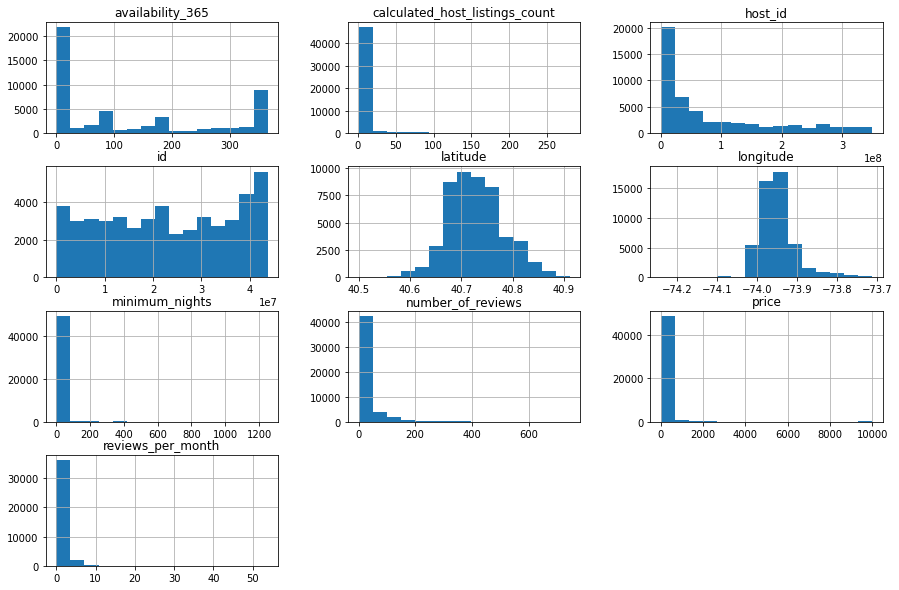

In [ ]:
df.hist(figsize=(15,10),bins=15);

### **Q4. Há outliers presentes?**

Outliers são valores fora da curva, se diferencia muito dos outros valores observados e acabam gerado distorção na análise dos dados se não forem tratados. Um outlier pode ocorrer por erro de digitação, por exemplo, deveria ser digitado o valor 10 mas foi digitado o valor 100000.

Com o histograma já da pra ter uma ideia da presença de outliers, como por exemplo nas colunas 'price' e 'minimum nights'

Para confirmar, será feito um resumo estatístico e também plotar um gráfico boxplot.

In [ ]:
# informações estatísticas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,49530.000000,49530.000000,49530.000000,38211.000000,49530.000000,49530.000000
mean,162.643872,8.191540,23.867515,1.008095,6.233030,126.666848
std,419.312316,21.974833,48.245823,1.345213,25.485293,142.381428
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,2.000000,1.000000,0.150000,1.000000,0.000000
50%,101.000000,3.000000,5.000000,0.450000,1.000000,79.000000
75%,175.000000,6.000000,23.000000,1.420000,2.000000,267.000000
max,10000.000000,1250.000000,746.000000,53.800000,280.000000,365.000000


Valores acima de 30: 
827 entradas 
1.6696951342620634%


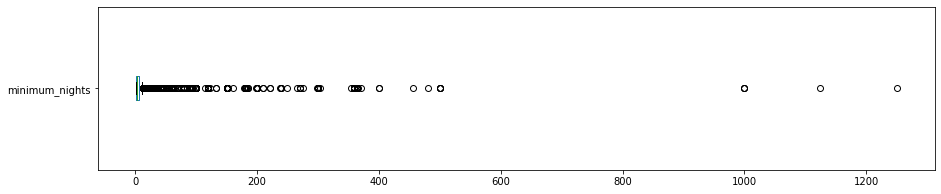

In [ ]:
# boxplot do minímo de noites

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

# quantidade de valores acima de 30 dias

print(f'Valores acima de 30: ')
print(f'{len(df[df.minimum_nights > 30])} entradas ')
print(f'{len(df[df.minimum_nights > 30]) / (df.shape[0]) * 100}%')

Valores acima de 300 : 
3253 entradas 
6.567736725217039%


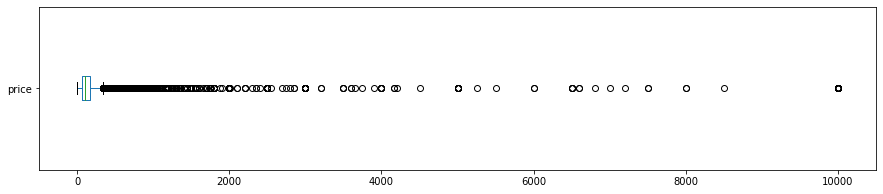

In [ ]:
# boxplot do preço

df.price.plot(kind='box', vert=False, figsize=(15,3))

# quantidade de valores acima de 300 dólares

print(f'Valores acima de 300 : ')
print(f'{len(df[df.price > 300])} entradas ')
print(f'{len(df[df.price > 300]) / (df.shape[0]) * 100}%')

#### **Histograma sem outliers**

Agora que foi identificado a presença de outliers, será plotado um histograma sem a presença deles (ou com presença reduzida)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


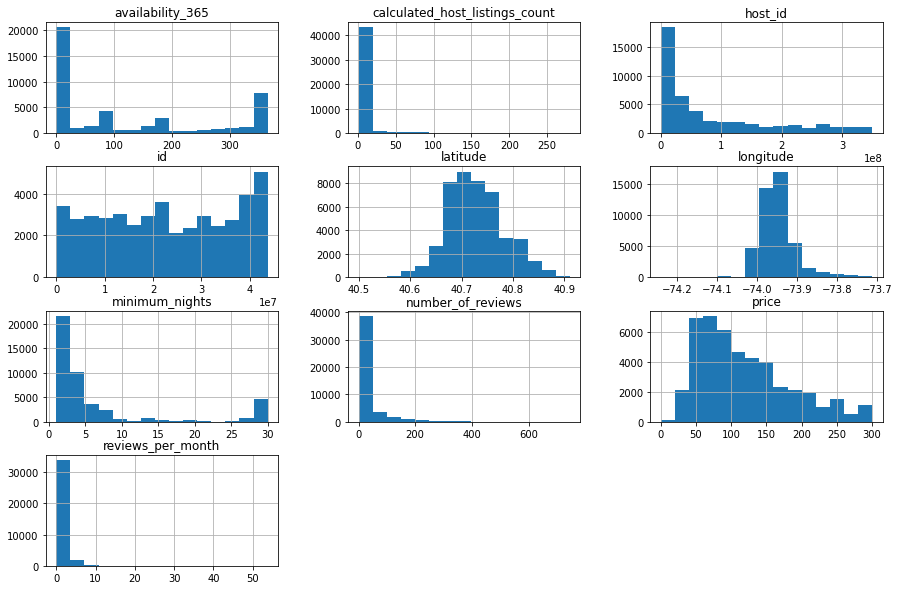

In [ ]:
# Removendo os outliers preço e minimo de noites em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df.minimum_nights > 30].index, axis=0, inplace=True)

# Removendo 'neighbourhood_group

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar o histograma para as variáveis númericas:

df_clean.hist(bins=15, figsize=(15,10));

#### **Qual é a correlação existente entre as variáveis?**

Correlação é a força da relação entre variáveis. Se duas variáveis se movem na mesma direção, enquanto uma aumenta a outra também aumenta, a correlação é positiva. Se forem para lados opostos, correlação negativa. Já se for 0, não há correlação.

Será criado:

* Matriz de correlação
* Mapa de calor dessa matriz


In [ ]:
# matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.049580,-0.024763,-0.042344,0.069741,0.050309
minimum_nights,0.049580,1.000000,-0.141275,-0.173406,0.424063,0.252499
number_of_reviews,-0.024763,-0.141275,1.000000,0.727314,-0.077191,0.204081
reviews_per_month,-0.042344,-0.173406,0.727314,1.000000,-0.067676,0.220756
calculated_host_listings_count,0.069741,0.424063,-0.077191,-0.067676,1.000000,0.188027
availability_365,0.050309,0.252499,0.204081,0.220756,0.188027,1.000000


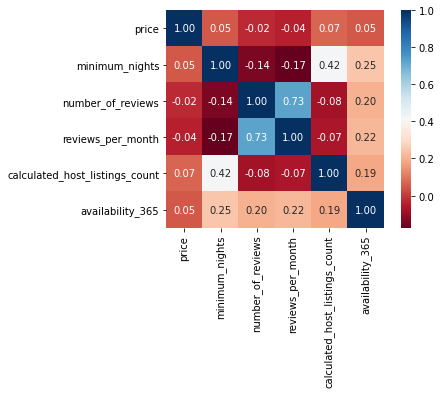

In [ ]:
# mapa de calor da matriz de correlação

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

O campo 'room_type' nos mostra o tipo de imóvel a ser alugado: se é a casa inteira, apenas um quarto, quarto dividido ou quarto de hotel. Fazendo uma análise é possivel ver que o tipo mais ofertado é a casa inteira, mas o aluguel de um quarto vem logo atrás.

In [ ]:
# quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    22471
Private room       21659
Shared room         1063
Hotel room           328
Name: room_type, dtype: int64

In [ ]:
# porcentagem de cada tipo de imóvel:

((df_clean.room_type.value_counts()) / (df.shape[0])) * 100

Entire home/apt    45.368464
Private room       43.729053
Shared room         2.146174
Hotel room          0.662225
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

De acordo com o dataset, o local mais caro é Breezy Point. Se olharmos só por esse ângulo, é possível pensar que Breezy Point é o lugar mais caro de Nova York, mas se olharmos mais fundo, veremos que em Breezy Point há apenas uma imóvel para alugar, podendo então distorcer a realidade. O mesmo ocorre com Neponsit, com 3 imóveis. A partir de Tribeca, o número de ofertas começa a aumentar (144), dando uma melhor idéia sobre os preços no local.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Breezy Point          209.333333
Neponsit              200.000000
Tribeca               190.368056
Flatiron District     186.321429
West Village          183.072698
                         ...    
Westchester Square     53.333333
Grant City             51.125000
Soundview              50.882353
South Beach            50.000000
Bull's Head            37.666667
Name: price, Length: 219, dtype: float64

In [ ]:
# quantidades de imóveis disponíveis no bairro Breezy Point

df_clean[df_clean['neighbourhood'] == 'Breezy Point'].shape[0]

3

In [ ]:
# quantidades de imóveis disponíveis no bairro Neponsit

df_clean[df_clean['neighbourhood'] == 'Neponsit'].shape[0]

1

In [ ]:
# quantidades de imóveis disponíveis no bairro Tribeca

df_clean[df_clean['neighbourhood'] == 'Tribeca'].shape[0]

144

In [ ]:
# quantidades de imóveis disponíveis no bairro Flatiron District

df_clean[df_clean['neighbourhood'] == 'Flatiron District'].shape[0]

56

In [ ]:
# quantidades de imóveis disponíveis no bairro West Village

df_clean[df_clean['neighbourhood'] == 'West Village'].shape[0]

619

In [ ]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Woodrow            2350.000000
Manhattan Beach     926.750000
Fort Wadsworth      800.000000
Prince's Bay        506.666667
Midtown             484.124925
                      ...     
Hunts Point          53.500000
Grant City           51.125000
Soundview            50.882353
South Beach          50.000000
Bull's Head          37.666667
Name: price, Length: 222, dtype: float64

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média de mínimo de noites é de 6.5 noites.

In [ ]:
df_clean.minimum_nights.mean()

6.530634212780915

### **Concentração dos imóveis em Nova York**

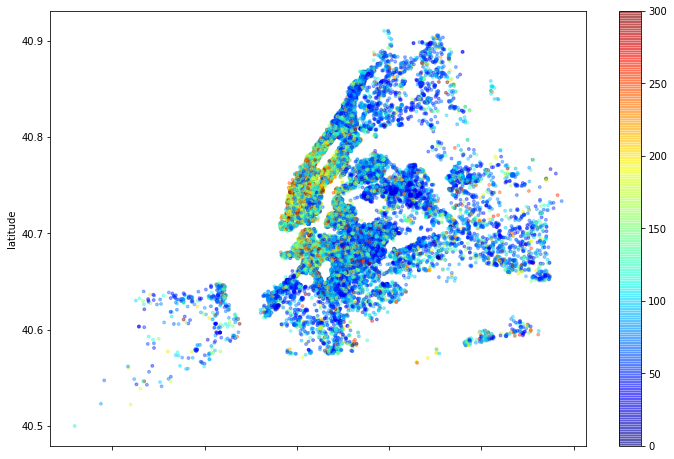

In [ ]:
# plotagem de imóveis pela latitude e longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feito uma análise superficial sobre os dados do AirBnb na cidade de Nova York. De início, já deu para perceber a presença de outliers, que são pontos fora da curva, amostras muito diferentes das demais, que podem distorcer conclusões sobre os dados.

Esses outliers foram excluídos (talvez algumas poucas amostras com valores reais também tenham sido excluídas) e um panorama mais real sobre os dados foi obtido.

Analisando os locais mais caros da cidade de Nova York, conclui-se que talvez haja uma distorção, visto que os bairros que ocupavam as duas primeiras posições tinham poquíssimas amostras.

Esse dataset é uma versão resumida e é apenas uma abordagem inicial, recomendando uma análise exploratória mais profunda e com dados completos.